© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# Visualization and Data Processing

This notebook introduces the basics of data visualization using the `matplotlib` package, and data handling and exploration using the `pandas` package.

## 📊 Visualization with Matplotlib

The Python package `matplotlib` offers a wide variety of tools for creating visualizations — from simple line plots to complex charts.

Today, we’ll go through a few basic examples to get you started.

🔍 For inspiration or more advanced usage, check out the [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html) — it has plenty of ready-to-run code examples you can adapt for your own projects.

In [56]:
import numpy as np
import matplotlib.pyplot as plt # Imports the plotting module and gives it the short name 'plt' (standard convention)

### Numpy support

Matplotlib is well-integrated with Numpy, and has basic LaTeX support!

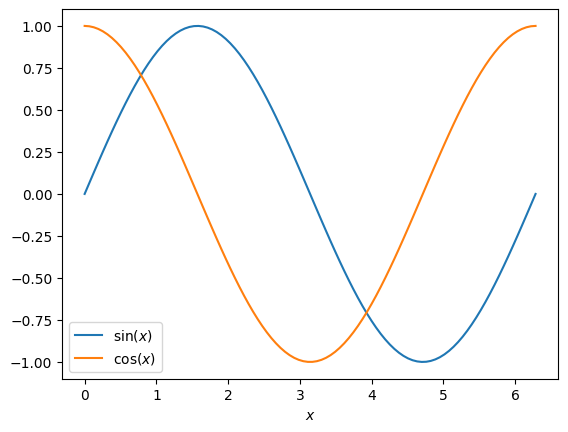

In [57]:
x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, np.sin(x), label='$\\sin(x)$')
plt.plot(x, np.cos(x), label='$\\cos(x)$')
plt.xlabel('$x$')
plt.legend()

Although the arguments in ```plot()``` might look similar to how we define functions in math (like $x \mapsto \sin(x)$), keep in mind that ```x``` is actually a NumPy array — a grid of 100 equally spaced floating-point numbers between 0 and $2\pi$.

When we write ```np.sin(x)```, we’re applying the $\sin$ function element-wise to each value in that array. The result is another NumPy array with the same shape, containing the sine of each value in ```x```.

In [58]:
print("First few values of x:", x[:5])
print("First few values of y = sin(x):", np.sin(x)[:5])

First few values of x: [0.         0.06346652 0.12693304 0.19039955 0.25386607]
First few values of y = sin(x): [0.         0.06342392 0.12659245 0.18925124 0.25114799]


### Figures, Axes, and Subplots

Matplotlib’s graph is a `Figure` object that can contain one or more `Axes` — which correspond to individual plots or subplots.

There are two main ways (or *paradigms*) to control what gets drawn and where:

- **State-machine interface**: This keeps track of the currently active figure and axes.  
  We’ve used this style above with commands like `plt.plot(...)`.

- **Object-oriented interface**: This approach directly sends commands to specific `Axes` objects.  
  We’ll use this method below — it gives you more control, especially when creating multiple subplots.

Figures with multiple suplots can be created using `plt.subplots`. Let's look at its documentation:

In [59]:
?plt.subplots

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

We create our first example of a figure with subplots.

Text(0, 0.5, '$\\cos(x)$')

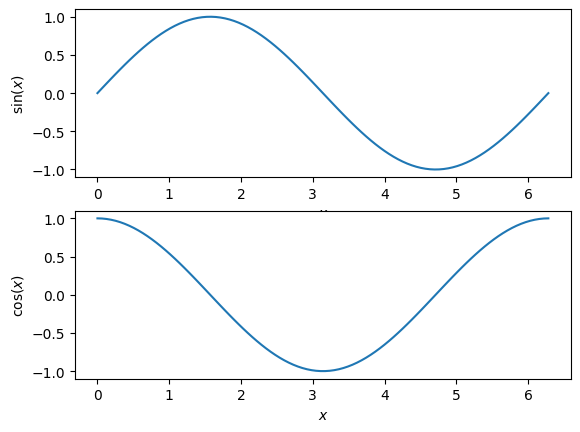

In [60]:
fig, axs = plt.subplots(2, 1) # 2 rows, 1 column

axs[0].plot(x, np.sin(x))
axs[0].set_xlabel('$x$')       #note the difference in syntax: plt.xlabel() but ax.set_xlabel()
axs[0].set_ylabel('$\\sin(x)$')

axs[1].plot(x, np.cos(x))
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$\\cos(x)$')

The same can be achived as follows with `plt`:

Text(0, 0.5, '$\\cos(x)$')

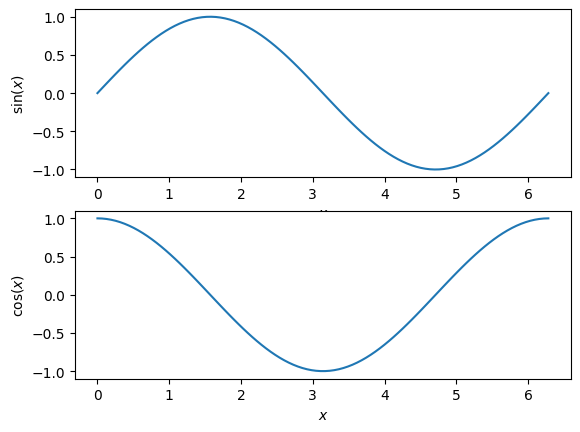

In [61]:
fig, axs = plt.subplots(2, 1)

plt.axes(axs[0]) # changes the current axis to axs[0]
plt.plot(x, np.sin(x))
plt.xlabel('$x$')       # note: plt.xlabel() but ax.set_xlabel()
plt.ylabel('$\\sin(x)$')

plt.axes(axs[1])
plt.plot(x, np.cos(x))
plt.xlabel('$x$')
plt.ylabel('$\\cos(x)$')

### More Examples

You can stack many plots in the same figure, and control line style, color, etc.

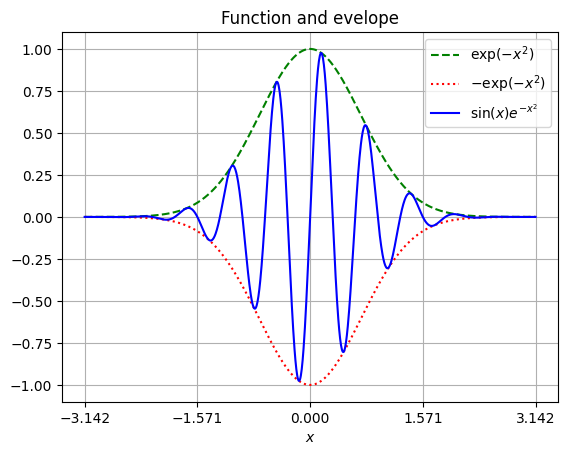

In [62]:
fig, ax = plt.subplots()

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(10*x)
envelope = np.exp(-x**2)

ax.set_title('Function and evelope')
ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.grid()
ax.plot(x, envelope, color='green', ls='--', label='$\\exp(-x^2)$')
ax.plot(x, -envelope, color='red', ls=':', label='$-\\exp(-x^2)$')
ax.plot(x, y*envelope, color='blue', label='$\\sin(x)e^{-x^2}$')
ax.set_xlabel('$x$')
ax.legend()

There are many supported plot types, e.g., scatter, bar, and contour plots:

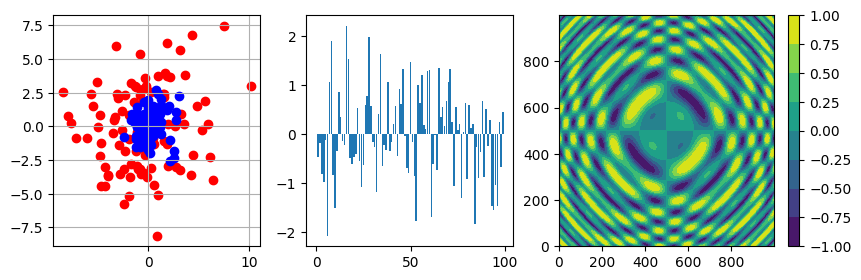

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(10,3), gridspec_kw={'width_ratios': [1, 1, 1.3]})

r1 = np.random.randn(100, 100)*3 
r2 = np.random.randn(100, 100)

axs[0].grid()
axs[0].scatter(r1[0,:], r1[:,0], color='red')
axs[0].scatter(r2[0,:], r2[:,0], color='blue')

h = np.random.randn(100)
axs[1].bar(np.arange(len(h)), h)

x = np.linspace(-5, 5, 1000).reshape(1, 1000)
y = np.linspace(-5, 5, 1000).reshape(1000, 1)
cp = axs[2].contourf(np.sin(x * y) * np.cos(x**2 + y**2))
fig.colorbar(cp)

Also 3d plots:

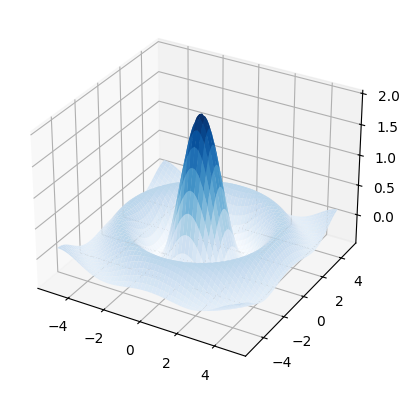

In [64]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(2*R) / R

surf = ax.plot_surface(X, Y, Z, cmap=cm.Blues)

## 🐼 Handle Data with Pandas

The `pandas` package provides powerful tools for loading, exploring, and pre-processing data.

Its two main data structures are:

- `Series`: a one-dimensional labeled array  
- `DataFrame`: a two-dimensional table (like a spreadsheet or SQL table)

They behave similarly to NumPy arrays, but with a lot more functionality — including labels, missing data handling, grouping, and much more.

In [65]:
import pandas as pd 

`Series` objects are similar to Python lists or 1D NumPy arrays.  
However, they come with many extra features — most notably, you can assign them custom (non-integer) indices, including labels or even boolean conditions for filtering.


In [66]:
s = pd.Series([1, 2, 3])
print(s)

0    1
1    2
2    3
dtype: int64


In [67]:
print(s[1])

2


In [68]:
s.index = ['eins', 'zwei', 'polizei']
print(s)

eins       1
zwei       2
polizei    3
dtype: int64


In [69]:
print(s['zwei'])

2


Pandas allows indexing by an array:

In [70]:
print(s[['zwei', 'eins']])

zwei    2
eins    1
dtype: int64


And easy filtering:

In [71]:
print(s[s>1])

zwei       2
polizei    3
dtype: int64


Concating two series along an axis gives a `DataFrame`, which has similarly powerful indexing functionality:

In [72]:
s1 = pd.Series(np.random.randn(3), index=['A', 'B', 'C'], name='s1')
s2 = pd.Series(np.random.randn(3), index=['A', 'B', 'C'], name='s2')
df = pd.concat([s1, s2], axis=1)

print(s1, end='\n\n')
print(s2, end='\n\n')

df

A   -1.759086
B    0.292173
C   -0.059702
Name: s1, dtype: float64

A   -1.014050
B    0.222281
C   -1.607562
Name: s2, dtype: float64



,s1,s2
A,-1.759086,-1.014050
B,0.292173,0.222281
C,-0.059702,-1.607562


In [73]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [74]:
df.values

array([[-1.75908633, -1.01405016],
       [ 0.29217286,  0.22228115],
       [-0.05970178, -1.60756239]])

Pandas comes with many built-in statistical functions that allow you to quickly analyze your data.

In [75]:
df.describe()

,s1,s2
count,3.000000,3.000000
mean,-0.508872,-0.799777
std,1.096919,0.933551
min,-1.759086,-1.607562
25%,-0.909394,-1.310806
50%,-0.059702,-1.014050
75%,0.116236,-0.395885
max,0.292173,0.222281


Indexing: 

In [76]:
df['s1']

A   -1.759086
B    0.292173
C   -0.059702
Name: s1, dtype: float64

In [77]:
df[['s1','s1']]

,s1,s1
A,-1.759086,-1.759086
B,0.292173,0.292173
C,-0.059702,-0.059702


In [78]:
df.loc['A']

s1   -1.759086
s2   -1.014050
Name: A, dtype: float64

In [79]:
df.loc['A':'B']

,s1,s2
A,-1.759086,-1.014050
B,0.292173,0.222281


In [80]:
df.loc['A':'B','s1':'s2']

,s1,s2
A,-1.759086,-1.014050
B,0.292173,0.222281


In [27]:
df.iloc[1:3]

,s1,s2
B,-2.148733,0.009535
C,0.172570,0.864302


In [83]:
df.iloc[1:3,1:]

,s2
B,0.222281
C,-1.607562


It is also easy to filter dataframes:

In [84]:
df[df['s2']>0]

,s1,s2
B,0.292173,0.222281


Apply a function to a dataframe:

In [86]:
df.apply(lambda x: x*2)

,s1,s2
A,-3.518173,-2.028100
B,0.584346,0.444562
C,-0.119404,-3.215125


Another useful function is ```groupby```:

In [87]:
df['s3']=['a','a','b']

In [88]:
df

,s1,s2,s3
A,-1.759086,-1.014050,a
B,0.292173,0.222281,a
C,-0.059702,-1.607562,b


In [89]:
df.groupby(by='s3')

In [90]:
df.groupby(by='s3').mean()

,s1,s2
s3,,
a,-0.733457,-0.395885
b,-0.059702,-1.607562


## 🌍 Example: Greenhouse Gas Concentration

In this example, we will obtain the global CO2 concentration data from the [Greenhouse Gas Factsheets page](https://greenhousegases.science.unimelb.edu.au), hosted by the University of Melbourne. We’ll download the data directly from the web using the provided URL.

To keep track of our carbon footprint, we will first save the data to a local file. Later on, we’ll load this data from the file so we don’t need to download it every time we run our code (a common routine in data analysis).

### Steps:
1. **Download the data** from the URL.
2. **Save the data** to a local file (CSV).
3. **Load the data** from the local file for analysis.

In [91]:
import os # Import the os module to interact with the operating system (file paths, checking if files exist, etc.)

# Define the local file name and the URL to the CO2 data
file_name = 'global_co2_database.csv'
url = 'https://greenhousegases.science.unimelb.edu.au/data/historical/CMIP6GHGConcentrationHistorical_1_2_0/mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_000001-201412.csv'

if os.path.exists(file_name): # Checks if the local file already exists
    print('Loading data from local file...') 
    # Read the local file into a pandas DataFrame
    df = pd.read_csv(file_name)
else:
    print('Loading data ...')
    # Download and read the data directly from the URL into a pandas DataFrame
    df = pd.read_csv(url)

    # Save the downloaded data to the local file for future use
    df.to_csv(file_name)

print('Done!')

Loading data ...
Done!


Let's inspect the data:

In [92]:
df

,datenum,year,month,day,datetime,data_mean_global,data_mean_nh,data_mean_sh
0,15.5,0,1,15,15-Jan-0000 12:00:00,278.366425,279.045654,277.687225
1,45.5,0,2,14,14-Feb-0000 12:00:00,278.713043,279.665405,277.760712
2,75.5,0,3,15,15-Mar-0000 12:00:00,279.013824,280.266785,277.760895
3,106.0,0,4,15,15-Apr-0000 00:00:00,279.209625,280.756592,277.662628
4,136.5,0,5,15,15-May-0000 12:00:00,279.106445,280.613495,277.599396
...,...,...,...,...,...,...,...,...
24175,735828.5,2014,8,17,17-Aug-2014 12:00:00,394.573456,393.376556,395.770386
24176,735859.0,2014,9,17,17-Sep-2014 00:00:00,395.026825,394.318665,395.734955
24177,735889.5,2014,10,17,17-Oct-2014 12:00:00,396.668762,397.456665,395.880859
24178,735920.0,2014,11,17,17-Nov-2014 00:00:00,398.189087,400.321228,396.056915


Compute a mean value for each year:

In [96]:
# Check the data types of each column in the DataFrame
print("Column data types:")
print(df.dtypes)

Column data types:
datenum             float64
year                  int64
month                 int64
day                   int64
datetime             object
data_mean_global    float64
data_mean_nh        float64
data_mean_sh        float64
dtype: object


In [99]:
df_years = df.groupby(by='year')[['data_mean_global','data_mean_nh','data_mean_sh']].mean() # only compute means for the numeric columns

and plot the dynamic:

Text(0, 0.5, 'CO2 concentration [ppm]')

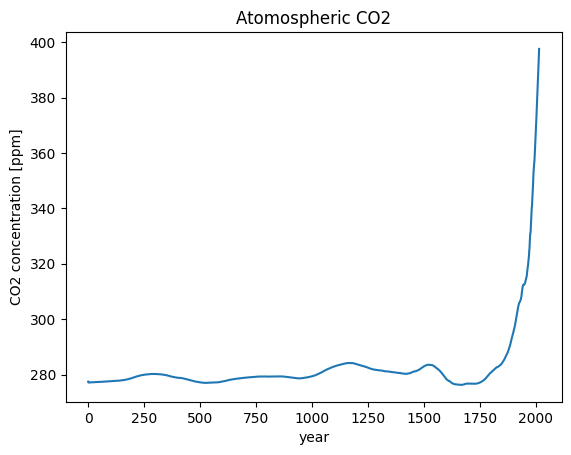

In [100]:
fig, ax = plt.subplots()

ax.set_title('Atomospheric CO2')
ax.plot(df_years.index, df_years['data_mean_global'])
ax.set_xlabel('year')
ax.set_ylabel('CO2 concentration [ppm]')

Visualizing data against time, such as months, days, or years, can sometimes be tricky. Fortunately, Pandas makes this process much easier with the  supports of `datetime` objects.

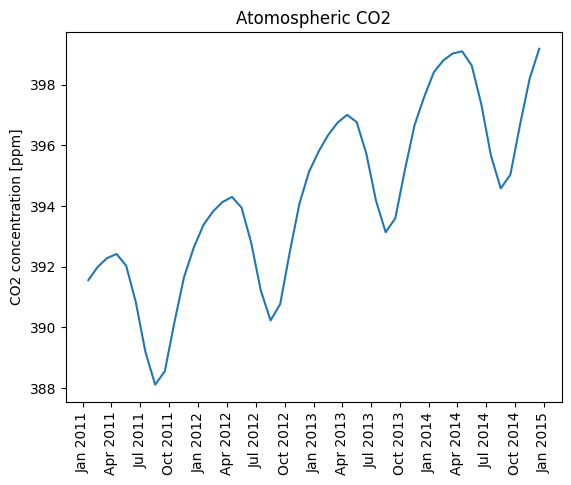

In [101]:
import matplotlib.dates as mdates # Import date formatting module from matplotlib

# Filter the dataframe to only include data from years after 2010
df_since_2010 = df[df['year']>2010].copy()

# Convert the 'datetime' column to actual datetime objects for proper handling in plots
df_since_2010['datetime'] = pd.to_datetime(df_since_2010['datetime'])

fig, ax = plt.subplots()

ax.set_title('Atomospheric CO2')
ax.plot(df_since_2010['datetime'], df_since_2010['data_mean_global'])
ax.set_ylabel('CO2 concentration [ppm]')

# Customize the x-axis:
# 1. Set major ticks at intervals of 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# 2. Format the x-axis labels to display the month and year (e.g., "Jan 2020")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# 3. Rotate the x-axis tick labels by 90 degrees for better readability
ax.xaxis.set_tick_params(rotation=90)

**Exercise 1:** Plot **yearly average** CO2 concentration **between 1700 and 2010**.

**Exercise 2:** Calculate the average CO₂ concentration for each **month** using data from 1980 onwards, and create a line plot.